# Imports

In [2]:
from config import * 
config_chapter0()

# This is needed to render plots
from plots.chapter0 import *

Finished!


In [3]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Visualizing Gradient Descent

## Model

$$
\Large y = b + w x + ϵ
$$

## Data Generation

### Sythetic Data Generation

In [67]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon 

### Train-Validation-Test Split

In [68]:
# Shufles the indices 
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N * .8)]
# Uses the remaining indices for validation
val_idx = idx[int(N * .8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx] 

In [6]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ace762750>,
       dtype=object))

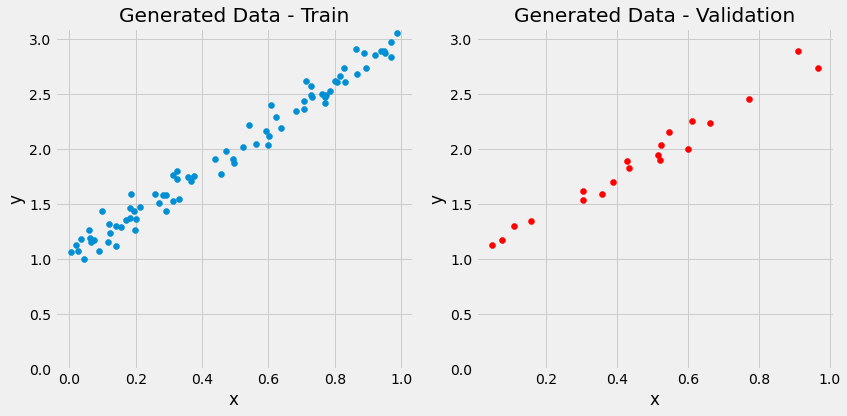

In [52]:
figure1(x_train, y_train, x_val, y_val)

## Step 0: Random Initialization

In [8]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


In [10]:
np.random.randn(2)

array([ 1.52302986, -0.23415337])

## Step 1: Compute Model's Prediction

In [11]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train 

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ad1c7fb10>)

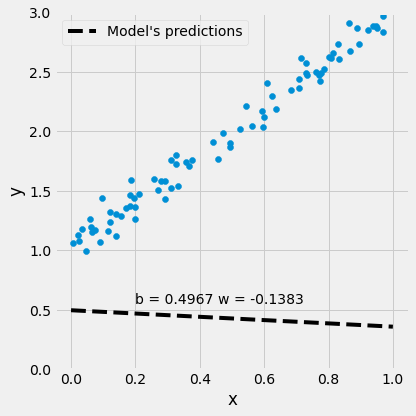

In [13]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\Large error_i = \hat{y_i} - y_i
$$

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ad1c22e10>)

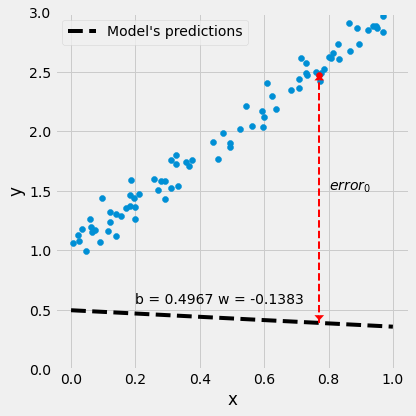

In [14]:
figure3(x_train, y_train, b, w)

$$
\Large 
\begin{aligned}
MSE &= \frac{1}{n} \sum_{i=1}^n{error_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i )}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i -y_i)}^2
\end{aligned}
$$

In [15]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is the BATCH gradient 
# descent. How wrong in our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss) 

2.7421577700550976


### Loss Surface

In [16]:
# Reminder:
# true_b = 1
# true_w = 2


# we have to split the ranges in 100 evenly spaced intervals each 
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
# meshgrid is a handy function that generates a grid of b and w
# values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [17]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [18]:
sample_x = x_train[0]
sample_yhat = bs + ws * sample_x 
sample_yhat.shape

(101, 101)

In [20]:
all_predictions = np.apply_along_axis(
    
  func1d = lambda x: bs + ws * x,
  axis = 1,
  arr = x_train 
)

all_predictions.shape

(80, 101, 101)

In [21]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [22]:
y_train.shape

(80, 1)

In [24]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [26]:
all_losses = (all_errors**2).mean(axis=0)
all_losses.shape

(101, 101)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


(<Figure size 864x432 with 2 Axes>,
 (<matplotlib.axes._subplots.Axes3DSubplot at 0x7f6ad1a4cf10>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f6ad1acd5d0>))

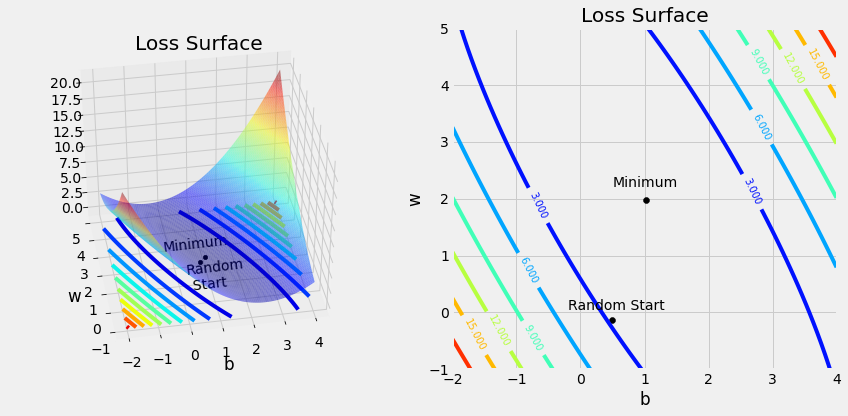

In [27]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

### Cross Sections

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ad0f66c90>,
       dtype=object))

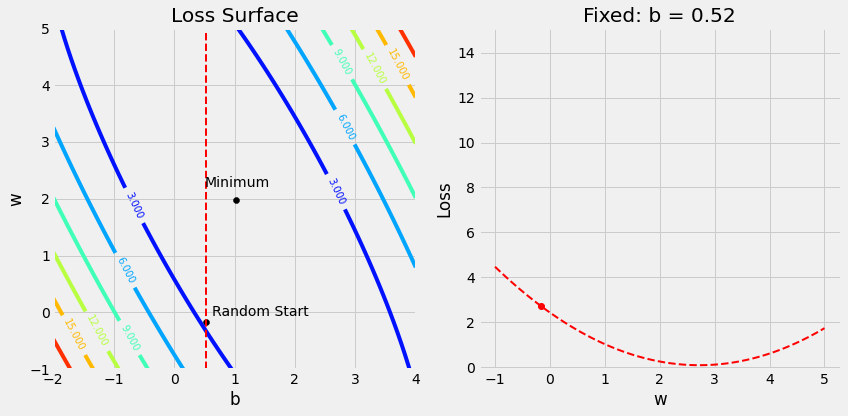

In [28]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ad12d1650>,
       dtype=object))

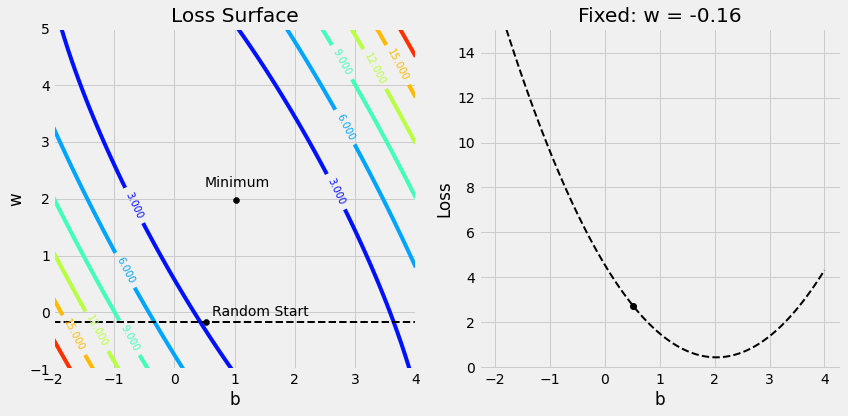

In [29]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

## Step 3: Compute the Gradients

$$
\large
\begin{aligned}
\frac{\partial{MSE}}{\partial{b}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{b}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i)} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}
\\
\frac{\partial{MSE}}{\partial{w}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{w}} &= \frac{1}{n} \sum_{i=1}^n{2(b + w x_i - y_i) \cdot x_i} 
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_i (\hat{y_i} - y_i)}
\end{aligned}
$$

In [33]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Visualizing the Gradients

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ad148f590>,
       dtype=object))

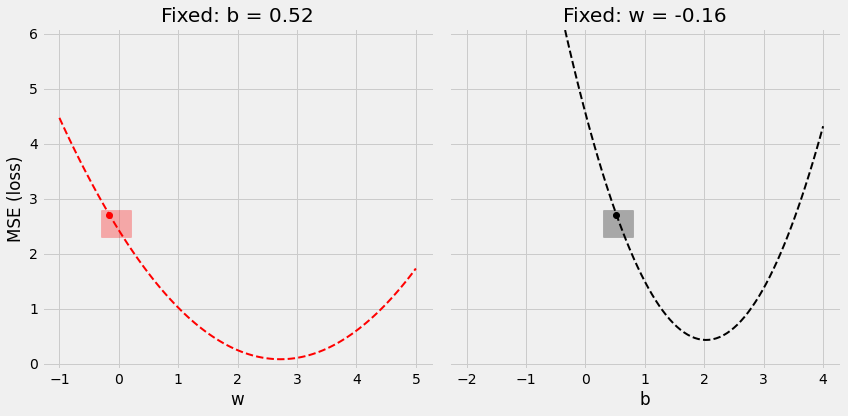

In [34]:
figure7(b, w, bs, ws, all_losses)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ad140b150>,
       dtype=object))

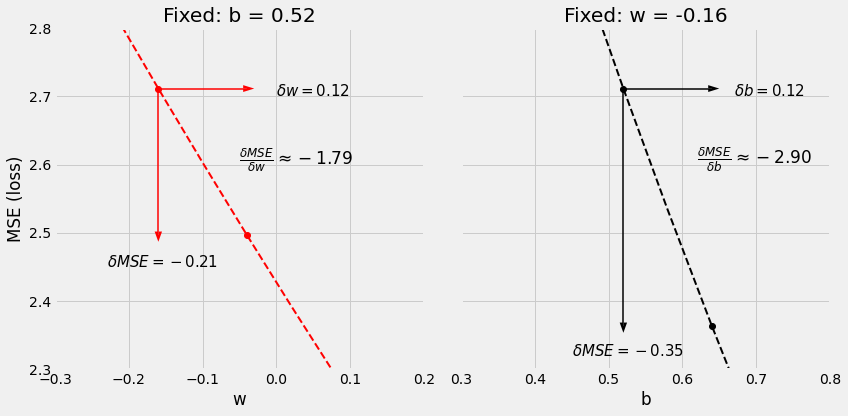

In [35]:
figure8(b, w, bs, ws, all_losses)

### Backpropagation

## Step 4: Update the Parameters

$$
\Large
\begin{aligned}
& b = b - \eta \frac{\partial{MSE}}{\partial{b}}
\\
& w = w - \eta \frac{\partial{MSE}}{\partial{w}}
\end{aligned}
$$

In [36]:
# Sets learning rate - this is "eta" ~ the "n" like Gree letter 
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the 
# learning rate 
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ad1881490>)

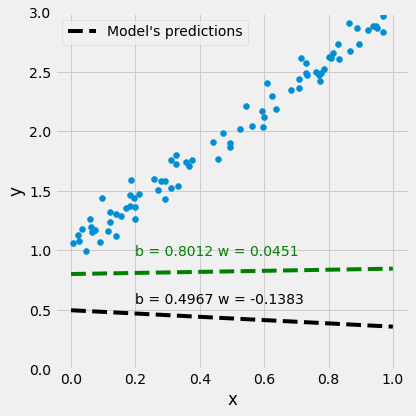

In [37]:
figure9(x_train, y_train, b, w)

### Learning Rate

In [38]:
manual_grad_b = - 2.90
manual_grad_w = - 1.79

np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

### Small Learning Rate

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ad138edd0>,
       dtype=object))

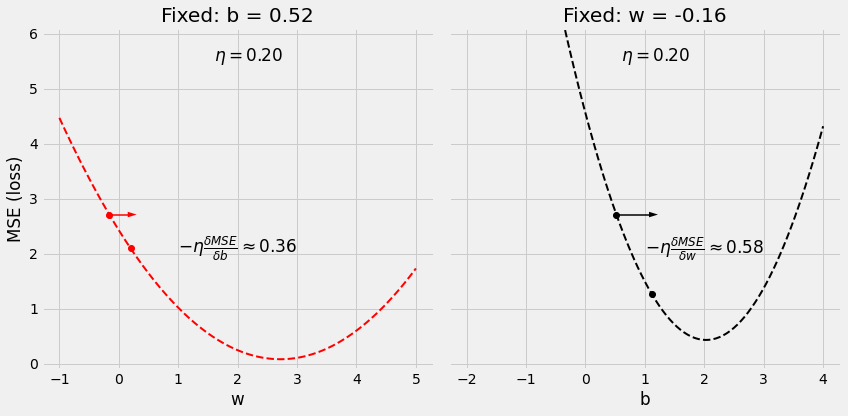

In [39]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .2

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

### Big Learning Rate

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6acee59350>,
       dtype=object))

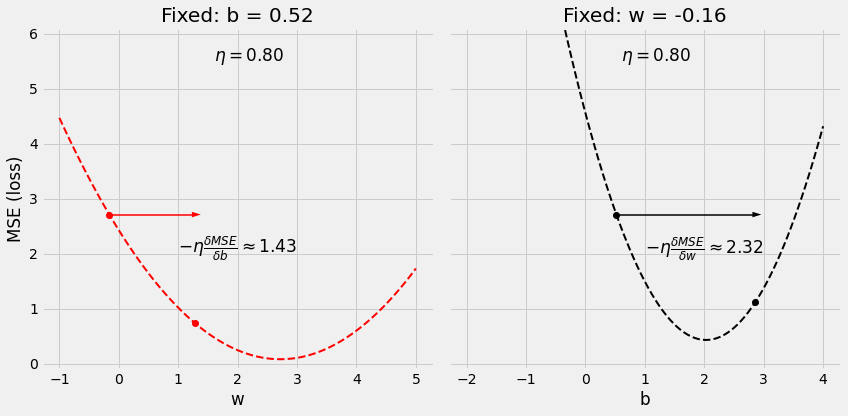

In [40]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .8

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

### Very Big Learning Rate

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6aced55c90>,
       dtype=object))

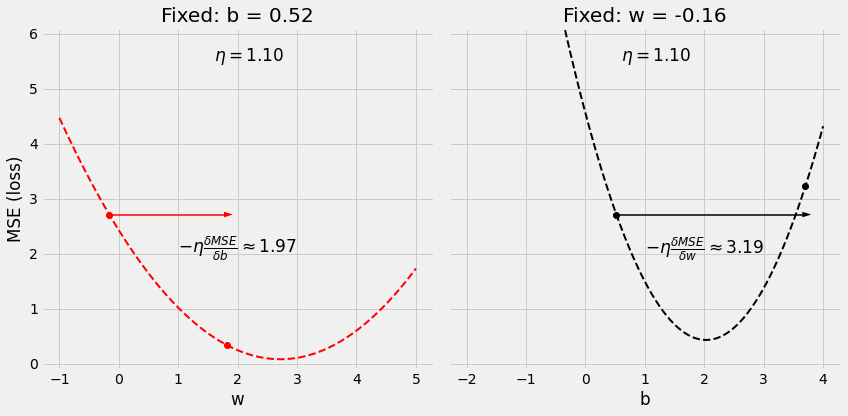

In [41]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = 1.1

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

### Bad Feature

In [54]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)

# We divide w by 10
bad_w = true_w /10
# And multiply x by 10
bad_x = np.random.randn(N, 1) * 10

# So the net effect on y is zero - it is still
# the same as before 
y = true_b + bad_w * bad_x + (.1 * np.random.randn(N, 1))

In [55]:
# Generate train and validation sets
# It uses same train_idx and val_idx as before,
# but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

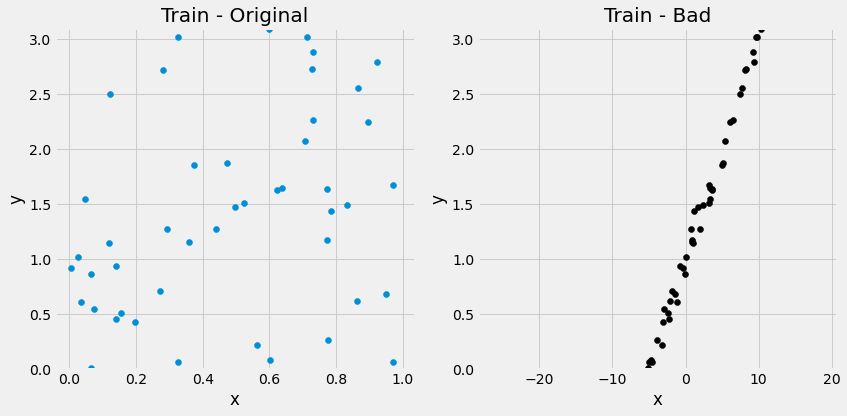

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - Bad')
fig.tight_layout()

In [57]:
# These ranges are CHANGED because we are centering at the new minimum, using "bad" data
bad_b_range = np.linspace(-2, 4, 101)
bad_w_range = np.linspace(-2.8, 3.2, 101)
bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)
 

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6acec31ad0>,
       dtype=object))

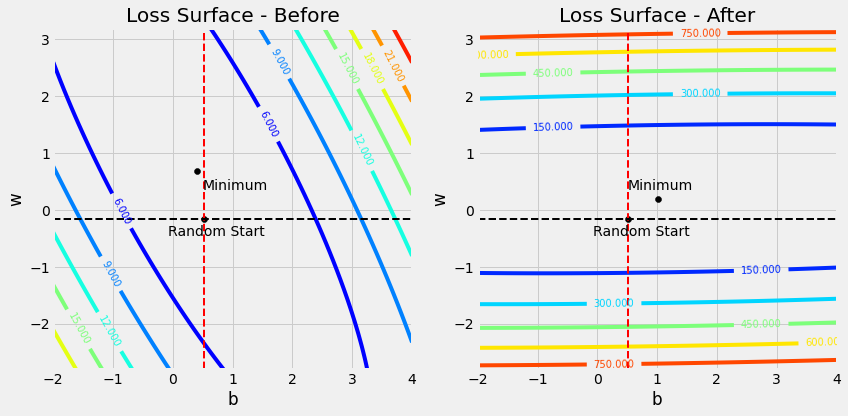

In [59]:
figure14(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ace605050>,
       dtype=object))

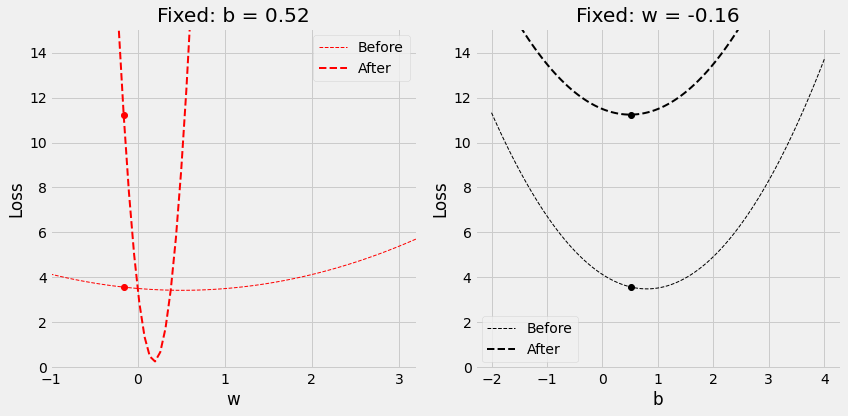

In [60]:
figure15(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

#### Scaling / Standardizing / Normalizing

$$
\Large
\overline{X} = \frac{1}{N}\sum_{i=1}^N{x_i}
\\
\Large
\sigma(X) = \sqrt{\frac{1}{N}\sum_{i=1}^N{(x_i - \overline{X})^2}}
\\
\Large
scaled x_i=\frac{x_i-\overline{X}}{\sigma(X)}
$$

In [61]:
scaler = StandardScaler(with_mean= True, with_std=True)
# We use train set only to fit the scaler 
scaler.fit(x_train)

# Now we can use the already fit scaler to TRANSFORM 
# both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

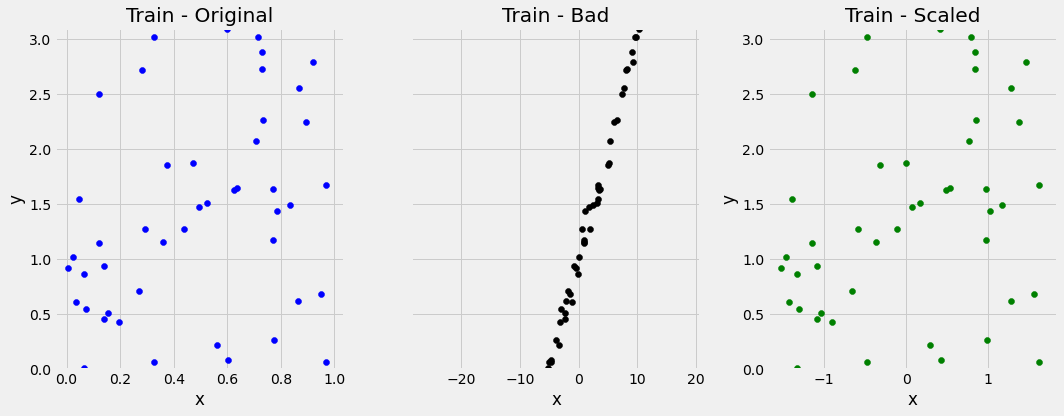

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].scatter(x_train, y_train, c='b')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - Bad')
ax[1].label_outer()
ax[2].scatter(scaled_x_train, y_train, c='g')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_ylim([0, 3.1])
ax[2].set_title('Train - Scaled')




fig.tight_layout()

In [64]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

(<Figure size 1080x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ace2723d0>,
       dtype=object))

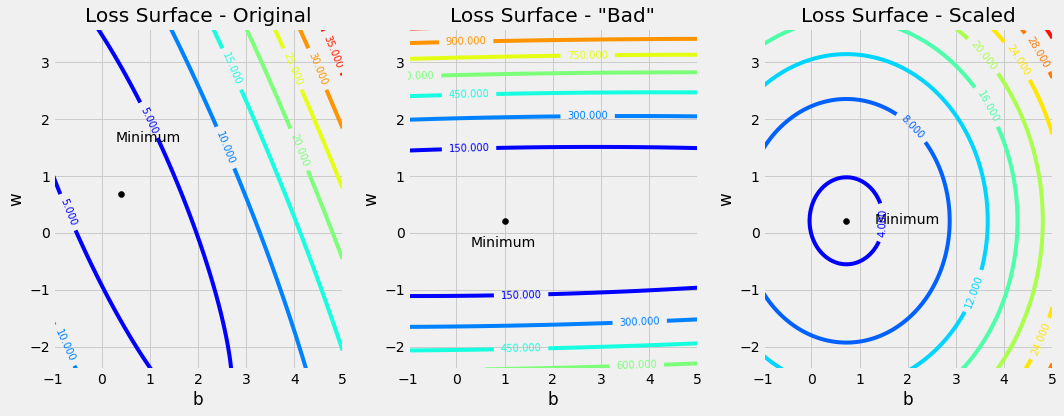

In [65]:
figure17(x_train, y_train, scaled_bs, scaled_ws, bad_x_train, scaled_x_train)

## Step 5: Rinse and Repeat!

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ace03ce10>)

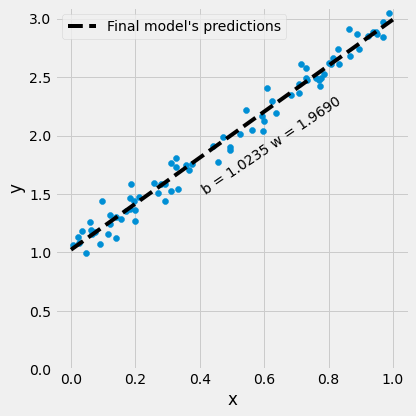

In [69]:
figure18(x_train, y_train)